In [1]:
# Dependencies
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
# Load words dataset table
words = pd.read_csv('data/database/words.csv', dtype={
    'tweet': np.unicode_,
    'index': np.int,
    'text': np.unicode_,
    'pos': np.unicode_,
    'conf': np.float
})

words

,tweet,index,text,pos,conf
0,1000007326789758987,7,poor,A,0.9889
1,1000007326789758987,8,area,N,0.9991
2,1000007326789758987,13,find,V,0.9979
3,1000007326789758987,17,community,N,0.9951
4,1000007326789758987,18,provide,V,0.9899
...,...,...,...,...,...
17586,999992837486850048,15,seem,V,0.9837
17587,999992837486850048,16,impossible,A,0.9872
17588,999997925869662208,2,impunity,N,0.9855
17589,999997925869662208,6,hold,V,0.9997


In [3]:
# Load tweets dataset table
tweets = pd.read_csv('data/database/tweets.csv', parse_dates=['created_at'], dtype={
    'id_str': np.unicode_,
    'text': np.unicode_
})

tweets

,created_at,id_str,text,truncated,geo,coordinates,place,retweet_count,favourite_count,in_reply_to_status_id_str,in_reply_to_user_id_str,lang
0,2018-06-30 22:35:06+00:00,1013189209488797697,"#PrideMonth may be ending today, but we will c...",True,NaN,NaN,NaN,73,NaN,NaN,NaN,en
1,2018-06-30 19:35:07+00:00,1013143915308953606,“This disaster leaves us in extreme poverty......,True,NaN,NaN,NaN,28,NaN,NaN,NaN,en
2,2018-06-30 18:35:07+00:00,1013128815575470081,We want more women on ballots 🗳️ when we go ou...,True,NaN,NaN,NaN,56,NaN,NaN,NaN,en
3,2018-06-30 16:35:09+00:00,1013098625768009728,“The idea that sexism &amp; misogyny in online...,True,NaN,NaN,NaN,107,NaN,NaN,NaN,en
4,2018-06-30 15:05:12+00:00,1013075989885341697,"When women are targeted online, the abuse is m...",True,NaN,NaN,NaN,209,NaN,NaN,NaN,en
...,...,...,...,...,...,...,...,...,...,...,...,...
3021,2017-06-01 00:56:25+00:00,870081565363232769,“We will hold our leaders accountable and make...,True,NaN,NaN,NaN,59,NaN,NaN,NaN,en
3022,2017-06-01 00:45:34+00:00,870078835689127937,“It’s a real treat to be in this room with my ...,True,NaN,NaN,NaN,52,NaN,NaN,NaN,en
3023,2017-06-01 00:35:36+00:00,870076329219289089,"“However good you are, people still think that...",True,NaN,NaN,NaN,160,NaN,NaN,NaN,en
3024,2017-06-01 00:29:11+00:00,870074711409078273,"“As women, we are the barometer of whether a s...",True,NaN,NaN,NaN,89,NaN,NaN,NaN,en


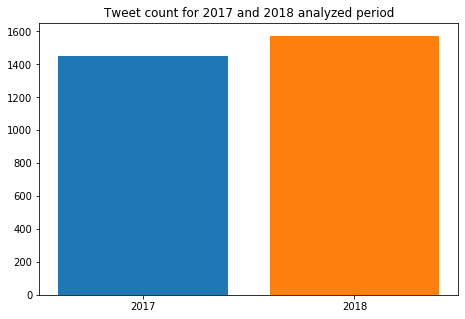

In [4]:
# Define words from tweets of 2017 and the ones from tweets of 2018
tweets_2017 = tweets.id_str[tweets.created_at.dt.year == 2017].values
tweets_2018 = tweets.id_str[tweets.created_at.dt.year == 2018].values

# Show tweets distribution
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Tweet count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], [len(tweets_2017)])
_ = ax.bar(['2018'], [len(tweets_2018)])
_ = plt.show()

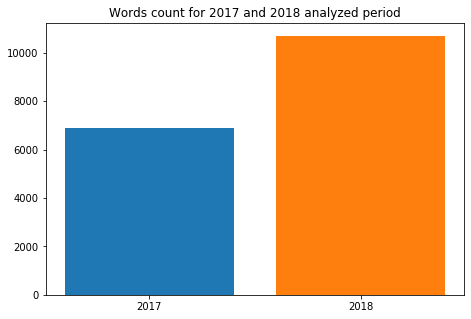

In [5]:
# Show word counts in tweets of 2017 and 2018 respectively
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Words count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], sum(words.tweet.isin(tweets_2017)))
_ = ax.bar(['2018'], sum(words.tweet.isin(tweets_2018)))
_ = plt.show()

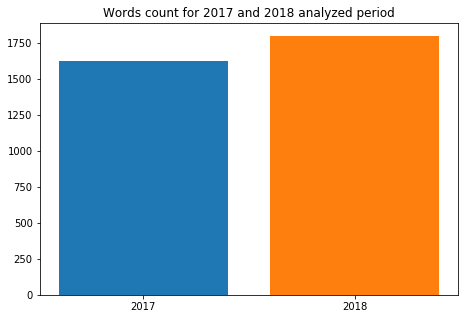

In [6]:
# Show unique word counts in tweets of 2017 and 2018 respectively

unique_words_2017 = words.text[words.tweet.isin(tweets_2017)].unique()
unique_words_2018 = words.text[words.tweet.isin(tweets_2018)].unique()

fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Words count for 2017 and 2018 analyzed period')
_ = ax.bar(['2017'], unique_words_2017.shape[0])
_ = ax.bar(['2018'], unique_words_2018.shape[0])
_ = plt.show()

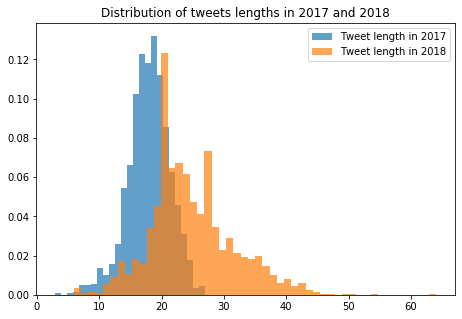

In [90]:
# Compute length of each tweet
tweets_ = tweets.loc[:, ['id_str']]
tweets_['len'] = tweets.apply(lambda t: len(t.text.split(' ')), axis=1)

# Show distribution of words number per tweet in 2017 and 2018
fig, ax = plt.subplots(figsize=(7.5, 5))
_ = ax.set_title('Distribution of tweets lengths in 2017 and 2018')
_ = ax.hist(tweets_[tweets_['id_str'].isin(tweets_2017)]['len'], bins=25, density=True, alpha=.7)
_ = ax.hist(tweets_[tweets_['id_str'].isin(tweets_2018)]['len'], bins=50, density=True, alpha=.7)
_ = ax.legend(['Tweet length in 2017', 'Tweet length in 2018'])
_ = plt.show()

In [7]:
# Define function for creating edges dataset
def get_edges(words):
    # Make join to obtain words in the same tweet
    edges = pd.merge(words, words, on='tweet')
    edges = edges[edges.index_x != edges.index_y]  # Remove self join

    # Count how many times the same word matches have been found
    edges = edges.groupby(['text_x', 'pos_x', 'text_y', 'pos_y']).size()
    edges = edges.reset_index(name='counts')

    # Get unique word (text, POS) set
    unique_words = words.groupby(by=['text', 'pos']).size().reset_index(name='counts')
    # Map each unique concept to a number and vice versa 
    w2i, i2w = dict(), dict()
    for index, word in unique_words.iterrows():
        w2i[(word.text, word.pos)] = index
        i2w[index] = (word.text, word.pos)
    # Map each word to a numeric index
    edges['number_x'] = edges.apply(lambda e: w2i[(e.text_x, e.pos_x)], axis=1)
    edges['number_y'] = edges.apply(lambda e: w2i[(e.text_y, e.pos_y)], axis=1)

    # Return dataset
    return edges, w2i, i2w

In [8]:
# Define function for adjacency matrix creation
def get_adjacency(edges, n, triangular=False):
    
    # Initialize adjacency matrix
    X = np.zeros(shape=(n, n), dtype=np.int)
    
    # Loop through each edge to fill adjacency matrix
    for i, edge in edges.iterrows():
        # Handle trianguarization
        if triangular and edge.number_y > edge.number_x:
            continue
        # Fill each cell with counts
        X[edge.number_y][edge.number_x] = edge.counts
            
    # Return filled adjacency matrix
    return X

In [9]:
# Define edges for 2017 and 2018 words, separately
edges_2017, w2i_2017, i2w_2017 = get_edges(words[words.tweet.isin(tweets_2017)])
edges_2018, w2i_2018, i2w_2018 = get_edges(words[words.tweet.isin(tweets_2018)])

# Retrieve adjacency matrices
X_2017 = get_adjacency(edges_2017, n=len(w2i_2017.keys()), triangular=True)
X_2018 = get_adjacency(edges_2018, n=len(w2i_2018.keys()), triangular=True)

# Show adjacency matrices
print('Adjacency matrix for tweets in 2017')
print(X_2017, end='\n\n')
print('Adjacency matrix for tweets in 2018')
print(X_2018)

Adjacency matrix for tweets in 2017
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Adjacency matrix for tweets in 2018
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


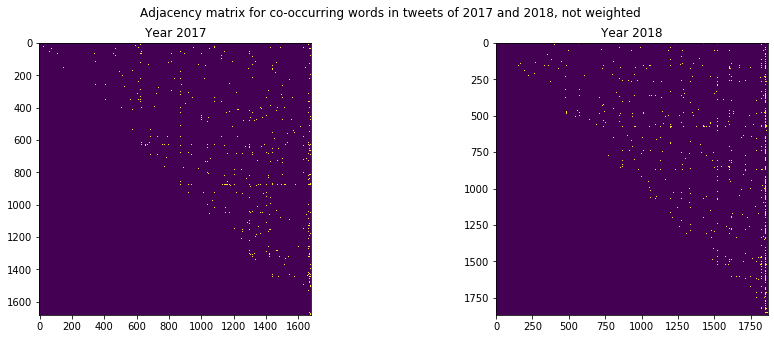

In [10]:
# Show adjacency matrices
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Adjacency matrix for co-occurring words in tweets of 2017 and 2018, not weighted')
_ = axs[0].set_title('Year 2017')
_ = axs[0].imshow(np.minimum(X_2017, np.ones(X_2017.shape)), cmap='viridis')
_ = axs[1].set_title('Year 2018')
_ = axs[1].imshow(np.minimum(X_2018, np.ones(X_2018.shape)), cmap='viridis')
_ = plt.show()

In [11]:
# Summary statistics

# Mean
mean_2017 = X_2017.sum().sum() / (X_2017.shape[0] * (X_2017.shape[0] - 1))
mean_2018 = X_2018.sum().sum() / (X_2018.shape[0] * (X_2018.shape[0] - 1))

# Density
density_2017 = np.minimum(X_2017, np.ones(X_2017.shape)).sum().sum()
density_2017 /= (X_2017.shape[0] * (X_2017.shape[0] - 1))
density_2018 = np.minimum(X_2018, np.ones(X_2018.shape)).sum().sum()
density_2018 /= (X_2018.shape[0] * (X_2018.shape[0] - 1))

# Print out
print('Mean value of the network is {:.03f} in 2017 and {:.03f} in 2018'.format(mean_2017, mean_2018))
print('Density value of the network is {:.03f} in 2017 and {:.03f} in 2018'.format(density_2017, density_2018))

Mean value of the network is 0.006 in 2017 and 0.011 in 2018
Density value of the network is 0.004 in 2017 and 0.007 in 2018


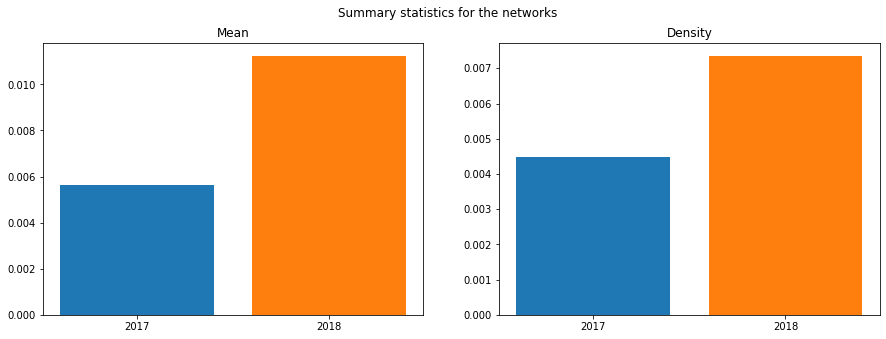

In [12]:
# Show summary statistics graphically
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Summary statistics for the networks')
_ = axs[0].set_title('Mean')
_ = axs[0].bar(['2017'], [mean_2017])
_ = axs[0].bar(['2018'], [mean_2018])
_ = axs[1].set_title('Density')
_ = axs[1].bar(['2017'], [density_2017])
_ = axs[1].bar(['2018'], [density_2018])
_ = plt.show()

In [13]:
# Create an undirected multilink graph object
net_2017 = nx.from_numpy_matrix(X_2017, parallel_edges=True, create_using=nx.MultiGraph)
net_2018 = nx.from_numpy_matrix(X_2018, parallel_edges=True, create_using=nx.MultiGraph)

# Get degrees fore every node in every network
degrees_2017 = pd.Series({node: val for node, val in net_2017.degree()})
degrees_2018 = pd.Series({node: val for node, val in net_2018.degree()})

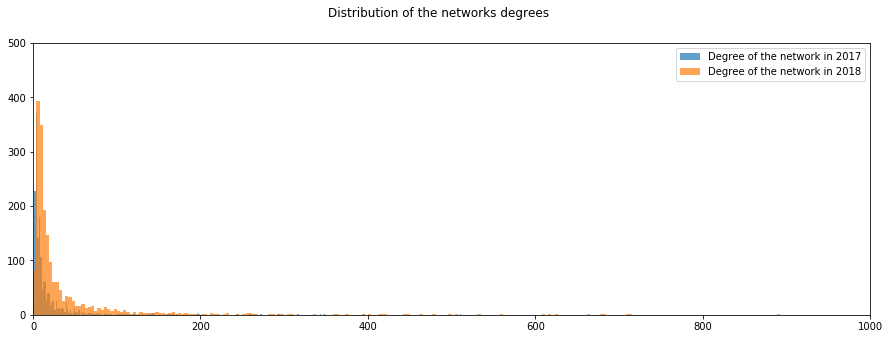

In [14]:
# Compare degrees graphically
fig, ax = plt.subplots(figsize=(15, 5))
_ = fig.suptitle('Distribution of the networks degrees')
_ = ax.hist(degrees_2017.values, bins=1000, alpha=0.7)
_ = ax.hist(degrees_2018.values, bins=1000, alpha=0.7)
_ = ax.set_ylim(0, 500)
_ = ax.set_xlim(0, 1000)
_ = ax.legend(['Degree of the network in 2017',
               'Degree of the network in 2018'])
_ = plt.show()

In [15]:
# Spot isolated nodes
isolated_2017 = degrees_2017.index[degrees_2017 == 0.0]
isolated_2018 = degrees_2018.index[degrees_2018 == 0.0]

# Print out results
print('There are {:d} isolated nodes in 2017 and {:d} in 2018'.format(len(isolated_2017), 
                                                                      len(isolated_2018)))

There are 8 isolated nodes in 2017 and 2 in 2018


In [16]:
# Remove isolated nodes from network

# Define networks
nets = [net_2017, net_2018]
# Define isolated nodes (to remove)
rm = [isolated_2017, isolated_2018]
# Loop through each isolated node and remove it
for i, net in enumerate(nets):
    # Remove isolated nodes
    for node in rm[i].values:
        net.remove_node(node)

# Get new node degrees
degrees = [pd.Series({node: val for node, val in net.degree()}) for net in nets]
degrees_2017 = degrees[0]
degrees_2018 = degrees[1]

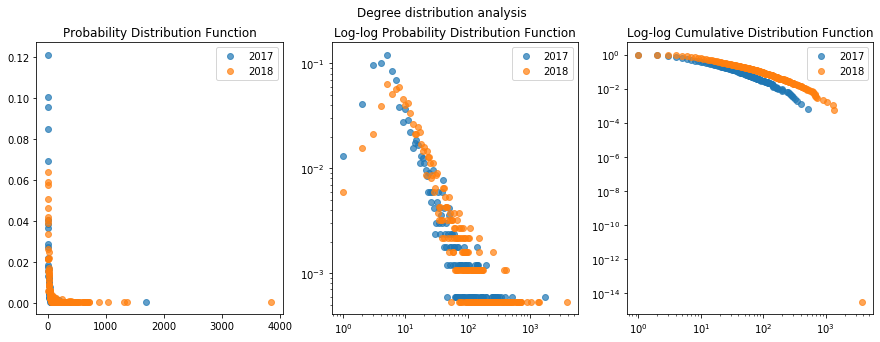

In [36]:
# Plot pdf, cdf, log-log, ... of each network

# Initialize plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
_ = fig.suptitle('Degree distribution analysis')
_ = axs[0].set_title('Probability Distribution Function')
_ = axs[1].set_title('Log-log Probability Distribution Function')
_ = axs[2].set_title('Log-log Cumulative Distribution Function')

# For each network, plot degree distribution
nets = [net_2017, net_2018]
freqs = [np.unique(degrees[i].values, return_counts=True) for i, net in enumerate(nets)] # Degrees frequencies
pdfs = [f[1] / np.sum(f[1]) for f in freqs]  # pdf of degrees
cdfs = [1 - np.cumsum(pdf) for pdf in pdfs]  # cdf of the degrees

# Create plot fore each network
for i, net in enumerate(nets):
    
    # Get values which will be plotted
    k = freqs[i][0]
    pdf = pdfs[i]
    cdf = cdfs[i]
    
    # Make plots
    _ = axs[0].plot(k, pdf, 'o', alpha=.7)
    _ = axs[1].loglog(k, pdf, 'o', alpha=.7)
    _ = axs[2].loglog(k, cdf, 'o', alpha=.7)
    
# Show plots
_ = [axs[i].legend(['2017', '2018'], loc='upper right') for i in range(3)]
_ = plt.show()

In [61]:
# Estimate power law parameters for each network

# Define saturation values (defined by looking at the graphs)
k_sat = [4, 7]
# Define parameters to be estimated
gamma, c, cutoff, k_min, k_max = [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]
# Do fo each network
for i, net in enumerate(nets):
    # Get the unique values of degree and their counts
    k = freqs[i][0]
    # Define minumum and maximum k (degree)
    k_min[i], k_max[i] = np.min(k), np.max(k)
    # Estimate parameters
    gamma[i] = 1 + degrees[i][k_sat[i]:].shape[0] / np.sum(np.log(degrees[i][k_sat[i]:] / k_sat[i]))
    c[i] = (gamma[i] - 1) * k_sat[i] ** (gamma[i] - 1)
    # Compute cutoff
    cutoff[i] = k_sat[i] * degrees[i].shape[0] ** (1 / (gamma[i] - 1))

# Print out results
print('Power law estimated parameters for 2017\'s network: gamma={:.03f}, c={:.03f}, cutoff={:.03f}'.format(
    gamma[0], c[0], cutoff[0]))
print('Power law estimated parameters for 2018\'s network: gamma={:.03f}, c={:.03f}, cutoff={:.03f}'.format(
    gamma[1], c[1], cutoff[1]))
print()

print('Minimum / maximum degree for 2017\'s network: {:d} / {:d}'.format(k_min[0], k_max[0]))
print('Minimum / maximum degree for 2018\'s network: {:d} / {:d}'.format(k_min[1], k_max[1]))

Power law estimated parameters for 2017's network: gamma=2.208, c=6.442, cutoff=1867.466
Power law estimated parameters for 2018's network: gamma=2.139, c=10.438, cutoff=5219.697

Minimum / maximum degree for 2017's network: 1 / 1687
Minimum / maximum degree for 2018's network: 1 / 3847


/home/damiclem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Attempted to set non-positive top ylim on a log-scaled axis.
Invalid limit will be ignored.
  


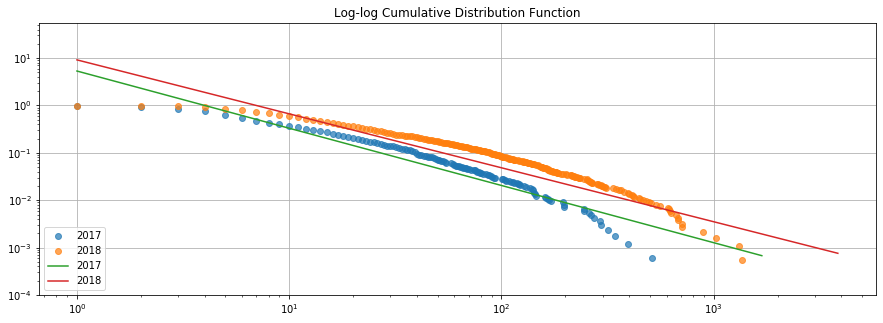

In [99]:
# Define regression lines values for either 2017 and 2018 distributions
est_2017 = c[0] * np.arange(1, np.max(freqs[0][0])) ** (1-gamma[0]) / (gamma[0] - 1)
est_2018 = c[1] * np.arange(1, np.max(freqs[1][0])) ** (1-gamma[1]) / (gamma[1] - 1)

# Show power law estimated rgeression line
fig, ax = plt.subplots(figsize=(15, 5))
_ = ax.set_title('Log-log Cumulative Distribution Function')
# For each network, plot either the actual cdf and the regression line
_ = ax.loglog(freqs[0][0], cdfs[0], 'o', alpha=.7)
_ = ax.loglog(freqs[1][0], cdfs[1], 'o', alpha=.7)
_ = ax.loglog(np.arange(1, np.max(freqs[0][0])), est_2017)
_ = ax.loglog(np.arange(1, np.max(freqs[1][0])), est_2018)
_ = ax.legend(['2017', '2018', '2017', '2018'], loc='lower left')
_ = ax.set_ylim(1e-04, 0)
_ = ax.grid()
_ = plt.show()

# Ranking

## Ranking by degree

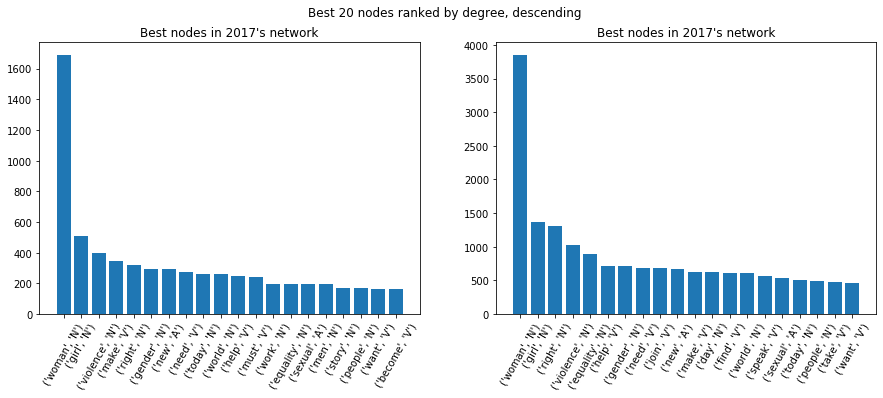

In [100]:
# Sort nodes by degree, descending
degrees_2017 = degrees[0].sort_values(ascending=False)
degrees_2018 = degrees[1].sort_values(ascending=False)

# Define subset (firs n-th)
best = 20

# Make plot
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
_ = fig.suptitle('Best 20 nodes ranked by degree, descending')
_ = axs[0].set_title('Best nodes in 2017\'s network')
_ = axs[0].bar(degrees_2017.index[:best].map(lambda x: str(i2w_2017[x])), degrees_2017.values[:best])
_ = axs[0].tick_params(axis='x', labelrotation=60)
_ = axs[1].set_title('Best nodes in 2017\'s network')
_ = axs[1].bar(degrees_2018.index[:best].map(lambda x: str(i2w_2018[x])), degrees_2018.values[:best])
_ = axs[1].tick_params(axis='x', labelrotation=60)
_ = plt.show()